In [4]:
#import xport.v56
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

### Data extraction

In [64]:
# Data file (mixture of different files from source) was prepared by lecturer.
# Here i just wanna try to do that on my own
# Data source: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015

# Files are in sas(xport) format. 
# How to work with xport format:
# https://pypi.org/project/xport/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sas.html

# Data files
path_demo = 'data/DEMO_I.XPT.txt'
path_bmx = 'data/BMX_I.XPT.txt'
path_bpx = 'data/BPX_I.XPT.txt'
path_alq = 'data/ALQ_I.XPT.txt'
path_smq = 'data/SMQ_I.XPT.txt'

df_demo = pd.read_sas(path_demo, format = 'xport')
df_bmx = pd.read_sas(path_bmx, format = 'xport')
df_bpx = pd.read_sas(path_bpx, format = 'xport')
df_alq = pd.read_sas(path_alq, format = 'xport')
df_smq = pd.read_sas(path_smq, format = 'xport')

print(df_demo.shape)
print(df_bmx.shape)
print(df_bpx.shape)
print(df_alq.shape)
print(df_smq.shape)

#print(len(np.intersect1d(df_demo.loc[:,'SEQN'], df_bmx.loc[:, 'SEQN'])))

df_new = df_demo.merge(df_bmx, on = 'SEQN').merge(df_bpx, on = 'SEQN').merge(df_alq, on = 'SEQN').merge(df_smq, on = 'SEQN')
print('df_new.shape: ', df_new.shape)

df_new = df_new.drop(df_new.columns.difference(
    ['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
     'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
     'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
     'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
     'BMXWAIST', 'HIQ210']), axis=1, inplace = False)
#df_new = df_new.loc[:, ['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
#                        'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
#                        'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2','BPXDI2', 
#                        'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC','BMXWAIST', 'HIQ210']]
print(df_new.columns)
print(df_new.shape) # one attribute is missing
#print(df_new.columns.difference(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
#       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
#       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
#       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
#       'BMXWAIST', 'HIQ210']))

(9971, 47)
(9544, 26)
(9544, 21)
(5735, 10)
(7001, 42)
df_new.shape:  (5735, 142)
Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2',
       'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR',
       'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST',
       'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'ALQ101', 'ALQ110', 'ALQ130',
       'SMQ020'],
      dtype='object')
(5735, 27)


In [6]:
# Mixture of raw file prepared by lecturer 
path = 'data/nhanes_2015_2016.csv'
da = pd.read_csv(path)
print(da.shape)
#print(da.columns)
print(da.dtypes)
#print(da.head())

(5735, 28)
SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object


### Missing values
When reading a dataset using Pandas, there is a set of values including 'NA', 'NULL', and 'NaN' that are taken by default to represent a missing value.  The full list of default missing value codes is in the '`read_csv`' documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).  This document also explains how to change the way that '`read_csv`' decides whether a variable's value is missing.

Pandas has functions called `isnull` and `notnull` that can be used to identify where the missing and non-missing values are located in a data frame.  Below we use these functions to count the number of missing and non-missing `DMDEDUC2` values.

In [66]:
print(pd.isnull(da).sum())
#print(pd.notnull(da).sum())
print(da.shape)

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2     261
DMDMARTL     261
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64
(5735, 28)


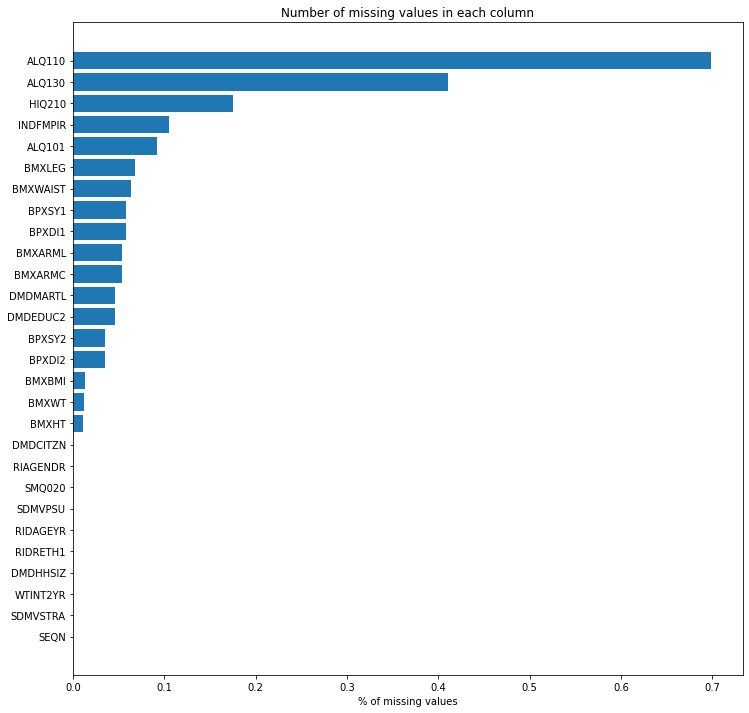

In [67]:
# plot missing values
missing_df = da.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.sort_values(by='missing_count')
missing_df
ind = np.arange(missing_df.shape[0])

fig, ax = plt.subplots(figsize = (12,12))
ax.barh(ind, missing_df['missing_count'] / len(da))
ax.set_yticks(ind)
ax.set_yticklabels(missing_df['column_name'])
ax.set_xlabel('% of missing values')
ax.set_title('Number of missing values in each column')
plt.show()

In [ ]:
sns.catplot()

In [68]:
# variables with > 50% missing values
missing_df['missing_percentage'] = missing_df['missing_count'] / len(da)
missing_df.head()
print(missing_df.loc[missing_df['missing_percentage'] > 0.5], )


  column_name  missing_count  missing_percentage
2      ALQ110           4004            0.698169


As an aside, note that there may be a variety of distinct forms of missingness in a variable, and in some cases it is important to keep these values distinct.  For example, in case of the DMDEDUC2 variable, in addition to the blank or NA values that Pandas considers to be missing, three people responded "don't know" (code value 9).  In many analyses, the "don't know" values will also be treated as missing, but at this point we are considering "don't know" to be a distinct category of observed response.

# Univariate data analyses - NHANES case study



## Numerical summaries

In [69]:
pd.set_option('display.max_columns', 50)
da.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,1.487881,126.236617,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,0.499897,4.244406,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,1.000000,119.000000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.000000,126.000000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,2.000000,130.000000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [70]:
da['BMXWT'].dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [71]:
# Individual summary statistics with pandas and numpy:
x = da['BMXWT'].dropna()
print(x.mean())
print(np.mean(x))
print(x.median())
print(np.median(x))
print(np.percentile(x, 50))
print(np.percentile(x, 75))
print(x.quantile(0.75))

81.34267560889516
81.34267560889516
78.2
78.2
78.2
92.7
92.7


## DMDEDUC2 - Education level

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Description of variables
# https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

In [73]:
print(da.DMDEDUC2.value_counts())
# By default value_counts method excludes missing values.
#print(da.DMDEDUC2.value_counts(dropna = False))

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64


In [74]:
# how many missing values in DMDEDUC2
print(da.DMDEDUC2.value_counts().sum()) # sum of values exluding missing values
print(da.DMDEDUC2.value_counts(dropna = False).sum()) # .. including missing values
print(pd.isnull(da['DMDEDUC2']).sum()) # sum of null values

5474
5735
261


### Education codes meaning

Codes explained here: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2



In some cases it is useful to replace integer codes with a text label that reflects the code's meaning. Below we do that in two ways: by merging with another df and by creating a new variable called 'DMDEDUC2x' that is recoded with text labels. Then we generate its frequency distribution.

In [75]:
# 1
df_edu = pd.DataFrame({'code': [1,2,3,4,5,7,9, None],
                       'education_level': ['Less than 9th grade', '9-11th grade (Includes 12th grade with no diploma)',
                                       'High school graduate/GED or equivalent', 'Some college or AA degree',
                                       'College graduate or above', 'Refused', 'Don\'t Know', 'Missing'],
                       'count': [688, 676,1236,1692,1422,0,5,4252]})
# print(df_edu)

#print(da.columns.difference(['DMDEDUC2', 'description']))

da_merged_edu = da.merge(df_edu, left_on = 'DMDEDUC2', right_on = 'code', how = 'left')
da_merged_edu.drop(da.columns.difference(['DMDEDUC2', 'education_level']), axis = 1, inplace = True)

print(da_merged_edu['education_level'].value_counts(dropna = False))

Some college or AA degree                             1621
College graduate or above                             1366
High school graduate/GED or equivalent                1186
Less than 9th grade                                    655
9-11th grade (Includes 12th grade with no diploma)     643
Missing                                                261
Don't Know                                               3
Name: education_level, dtype: int64


In [76]:
# 2
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1: '<9', 2: '9-11', 3: 'HS/GED', 
                                          4: 'Some college/AA', 5: 'College',
                                          7: 'Refused', 9: 'Don\'t Know'})

# fill missing values with 'Missing'
da['DMDEDUC2x'] = da['DMDEDUC2x'].fillna('Missing')

# printing proportions
c = da['DMDEDUC2x'].value_counts(dropna = False)
print(np.round(c / c.sum(),3))


Some college/AA    0.283
College            0.238
HS/GED             0.207
<9                 0.114
9-11               0.112
Missing            0.046
Don't Know         0.001
Name: DMDEDUC2x, dtype: float64


In [238]:
# the same for gender variable RIAGENDR
# https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR
print(da['RIAGENDR'].unique())
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
print(da['RIAGENDRx'].value_counts(dropna = False))


[1 2]
Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


### Graphical summaries

## BPXSY1 - Systolic blood pressure

"SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89.  

In [78]:
# pre-hypertensive based on systolic blood pressure 
print(
    np.mean(
        (da['BPXSY1'] >= 120) & (da['BPXSY2'] <= 139)))
# pre-hypertensive based on diastolic blood pressure 
print(
    np.mean(
        (da['BPXDI1'] >= 80) & (da['BPXDI2'] <= 89)))
# pre-hypertensive based on either systolic or diastolic blood pressure
print(
    np.mean(
        ((da['BPXSY1'] >= 120) & (da['BPXSY2'] <= 139)) |
        ((da['BPXDI1'] >= 80) & (da['BPXDI2'] <= 89))
    )
)

0.3741935483870968
0.14803836094158676
0.43975588491717527


Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [79]:
print(np.mean(da['BPXSY1'] - da['BPXSY2']))
print(np.mean(da['BPXDI1'] - da['BPXDI2']))

0.6749860309182343
0.3490407897187558


In [80]:
print(da.loc[:5, ['BPXSY1', 'BPXSY2']])

   BPXSY1  BPXSY2
0   128.0   124.0
1   146.0   140.0
2   138.0   132.0
3   132.0   134.0
4   100.0   114.0
5   116.0   122.0


### Graphical summaries

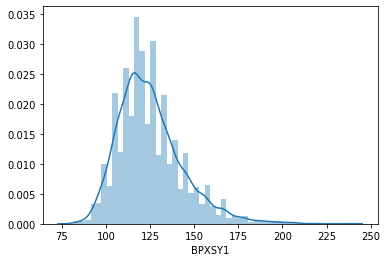

In [81]:
sns.distplot(da['BPXSY1'].dropna())

Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements. As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement ("white coat anxiety" effect).  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below

Text(0, 0.5, 'Blood pressure in mm/Hg')

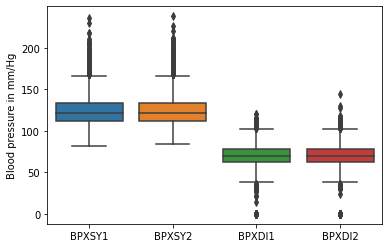

In [82]:
bp = sns.boxplot(data = da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])

bp.set_ylabel('Blood pressure in mm/Hg')

### Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age.  To see this trend in the NHANES data, we can [partition](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum.  Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data.  Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

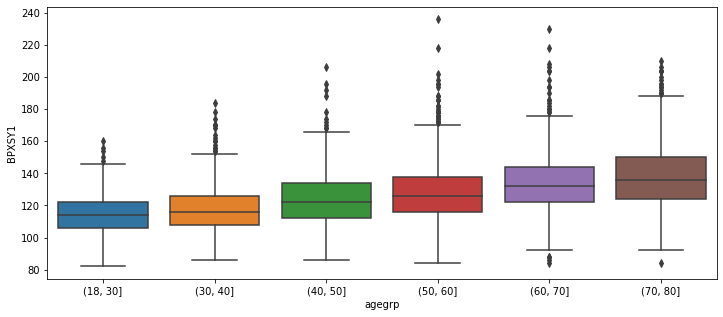

In [83]:
da['agegrp'] = pd.cut(da['RIDAGEYR'], [18,30,40,50,60,70,80])
# print(da.loc[:,['RIDAGEYR','agegrp']])
plt.figure(figsize = (12,5))
sns.boxplot(x = 'agegrp', y = 'BPXSY1', data = da)
plt.show()


Taking this a step further, it is also the case that blood pressure tends to differ between women and men.  While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure.  Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

In [84]:
print(da['RIAGENDRx'].head())

0      Male
1      Male
2      Male
3    Female
4    Female
Name: RIAGENDRx, dtype: object


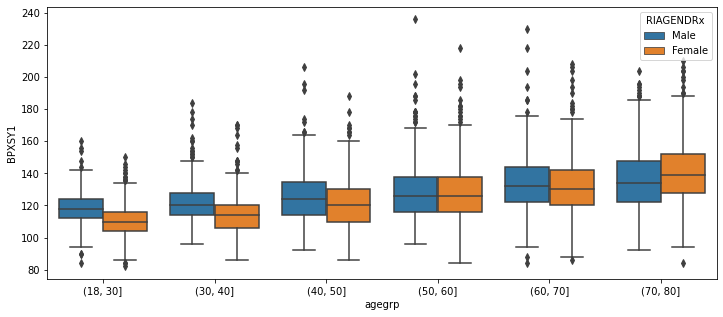

In [85]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'agegrp', y = 'BPXSY1', hue = 'RIAGENDRx', data = da)

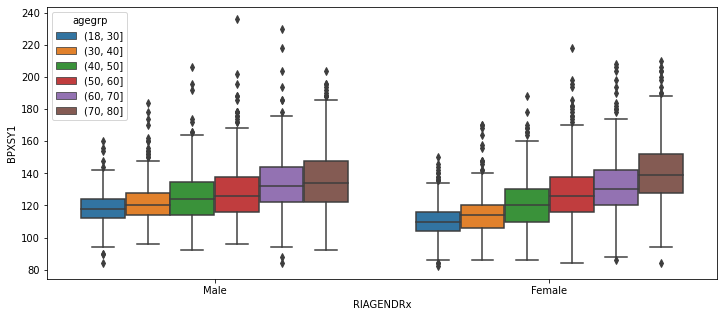

In [86]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'RIAGENDRx', y = 'BPXSY1', hue = 'agegrp', data = da)

Stratification can also be useful when working with categorical variables.  Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands.  While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates. 

**Explanation on causality:** Here we have seen differences in both blood pressure and educational attainment based on age.  It is plausible that aging directly causes blood pressure to increase.  But in the case of educational attainment, this is actually a "birth cohort effect".  NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later.  Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past.  Therefore, younger people as a group have higher educational attainment than older people as a group.  As these young people grow older, the cross sectional relationship between age and educational attainment will change.

In [87]:
#da.groupby('agegrp')['agegrp'].value_counts()
da.groupby('agegrp')['DMDEDUC2x'].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously.  In doing this, it is easier to interpret the results if we [pivot](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-stacking-and-unstacking) the education levels into the columns, and normalize the counts so that they sum to 1.  After doing this, the results can be interpreted as proportions or probabilities.  One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [88]:
dx = da.loc[~da['DMDEDUC2x'].isin(["Don't Know", 'Missing']), :] # Eliminate rare/missing values
dx = dx.groupby(['agegrp', 'RIAGENDRx'])['DMDEDUC2x']
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: round(x / x.sum(),3), axis = 1) # Normalize within each stratum to get proportions
dx
#print(dx.to_string(float_format = '%.3f')) # Limit display to 3 decimal places


DMDEDUC2x            9-11     <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                                
(18, 30] Female     0.080  0.049    0.282   0.215            0.374
         Male       0.117  0.042    0.258   0.250            0.333
(30, 40] Female     0.089  0.097    0.314   0.165            0.335
         Male       0.151  0.103    0.251   0.227            0.269
(40, 50] Female     0.110  0.106    0.299   0.173            0.313
         Male       0.142  0.112    0.274   0.209            0.262
(50, 60] Female     0.117  0.102    0.245   0.234            0.302
         Male       0.148  0.123    0.231   0.242            0.256
(60, 70] Female     0.118  0.188    0.195   0.206            0.293
         Male       0.135  0.151    0.233   0.231            0.249
(70, 80] Female     0.105  0.225    0.149   0.240            0.281
         Male       0.112  0.180    0.238   0.215            0.255

### BPXSY1, BPXSY2


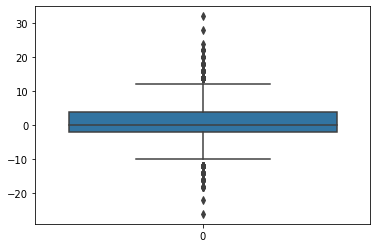

In [89]:
# Interperson difference in between the first and second systolic blood pressure measurents (BPXSY1 and BPXSY2)
sns.boxplot(data = da.loc[:, 'BPXSY1'] - da.loc[:, 'BPXSY2'])

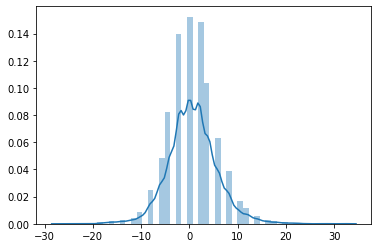

In [90]:
sns.distplot(da.loc[:, 'BPXSY1'] - da.loc[:, 'BPXSY2'])

In [91]:
#  proportion of the subjects having a lower SBP on the second reading compared to the first?
print(da.shape)
da_clean = da.dropna(subset = ['BPXSY1', 'BPXSY2'])
print(da_clean.shape)
print((da_clean['BPXSY1'] > da_clean['BPXSY2']).sum() / da_clean.shape[0])

(5735, 31)
(5369, 31)
0.45874464518532315


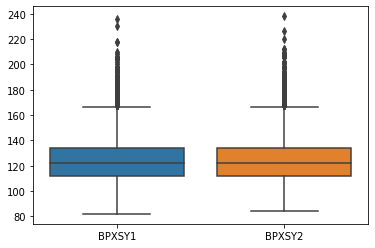

In [92]:
#  boxplots of the two systolic blood pressure variables
sns.boxplot(data = da.loc[:, ['BPXSY1', 'BPXSY2']])



## DMDMARTL - marital status

Info about DMDMARTL (https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL)

In [93]:
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x,RIAGENDRx,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,College,Male,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,HS/GED,Male,"(50, 60]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,HS/GED,Male,"(70, 80]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,College,Female,"(50, 60]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Some college/AA,Female,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,HS/GED,Female,"(70, 80]"
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,College,Male,"(18, 30]"
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,2.0,1,49050.06,2,132,2.97,154.0,56.0,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Some college/AA,Female,"(70, 80]"
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,<9,Male,"(30, 40]"


In [94]:
#print(da['DMDMARTL'].head())
#print(da['DMDMARTL'].describe())
#print(da['DMDMARTL'].unique())
#print(da['DMDMARTL'].value_counts())
da['DMDMARTLx'] = da['DMDMARTL'].replace({1: 'Married', 2: 'Widowed',
                                         3: 'Divorced', 4: 'Separated',
                                         5: 'Never Married', 6: 'Living with partner',
                                         77: 'Refused', 99: 'Don\'t know'
                                        })
# construct a frequency table of these values for all people, then for women only, and for men only
da['DMDMARTLx'].fillna('Missing', inplace = True)
x = da['DMDMARTLx'].value_counts()
print('***All***\n', round(x / x.sum(), 3), sep = '')
x = da.loc[da['RIAGENDRx'] == 'Male', 'DMDMARTLx'].value_counts()
print('***Male***\n', round(x / x.sum(), 3), sep = '')
x = da.loc[da['RIAGENDRx'] == 'Female', 'DMDMARTLx'].value_counts()
print('***Female***\n', round(x / x.sum(), 3), sep = '')

#Then construct these three frequency tables using only people whose age is between 30 and 40
x = da.loc[(30 < da['RIDAGEYR']) & 
           (da['RIDAGEYR'] < 40), 'DMDMARTLx'].value_counts()
print('***All 30-40***\n', round(x / x.sum(), 3), sep = '')
x = da.loc[ (da['RIAGENDRx'] == 'Male') &
           (30 < da['RIDAGEYR']) & 
           (da['RIDAGEYR'] < 40), 'DMDMARTLx'].value_counts()
print('***Male 30-40***\n', round(x / x.sum(), 3), sep = '')
x = da.loc[ (da['RIAGENDRx'] == 'Female') &
           (30 < da['RIDAGEYR']) & 
           (da['RIDAGEYR'] < 40), 'DMDMARTLx'].value_counts()
print('***Female 30-40***\n', round(x / x.sum(), 3), sep = '')




***All***
Married                0.485
Never Married          0.175
Divorced               0.101
Living with partner    0.092
Widowed                0.069
Missing                0.046
Separated              0.032
Refused                0.000
Name: DMDMARTLx, dtype: float64
***Male***
Married                0.535
Never Married          0.175
Living with partner    0.096
Divorced               0.083
Missing                0.049
Widowed                0.036
Separated              0.025
Refused                0.000
Name: DMDMARTLx, dtype: float64
***Female***
Married                0.438
Never Married          0.175
Divorced               0.118
Widowed                0.099
Living with partner    0.088
Missing                0.042
Separated              0.040
Refused                0.000
Name: DMDMARTLx, dtype: float64
***All 30-40***
Married                0.551
Never Married          0.201
Living with partner    0.145
Divorced               0.066
Separated              0.031
Widowed      

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1

In [95]:
da['agegrp1'] = pd.cut(da['RIDAGEYR'], [20,30,40,50,60,70,80,90])
da.drop('agegrp1', axis = 1)
x = da.loc[da['RIAGENDRx'] == 'Female', :].groupby('agegrp')['DMDMARTLx'].value_counts()
#x_sum = da.loc[da['RIAGENDRx'] == 'Female', 'agegrp'].value_counts() # counts in age groups

# 1
x1 = x.unstack()
x1 = x1.apply(lambda x: x/x.sum(), axis = 1)
#x1 = x1.stack() # we can again assemble to original form
#print(x1)

# 2
# the same with pd.pivot(), just for training
# first indexes -> to columns
x2 = pd.DataFrame(x)
x2['age_bins'] = x.index.get_level_values(level=0)
x2['marital_status'] = x.index.get_level_values(level=1)
x2 = x2.pivot(index='age_bins', columns='marital_status', values='DMDMARTLx')
x2 = x2.apply(lambda x: x / x.sum(), axis = 1)

print(x2)




marital_status  Divorced  Living with partner   Married   Missing  \
age_bins                                                            
(18, 30]        0.018062             0.187192  0.259442  0.091954   
(30, 40]        0.090717             0.120253  0.544304       NaN   
(40, 50]        0.137450             0.073705  0.573705       NaN   
(50, 60]        0.176596             0.068085  0.546809       NaN   
(60, 70]        0.192744             0.043084  0.480726       NaN   
(70, 80]        0.143902             0.007317  0.317073       NaN   

marital_status  Never Married   Refused  Separated   Widowed  
age_bins                                                      
(18, 30]             0.425287       NaN   0.018062       NaN  
(30, 40]             0.204641       NaN   0.035865  0.004219  
(40, 50]             0.125498       NaN   0.065737  0.023904  
(50, 60]             0.089362  0.002128   0.057447  0.059574  
(60, 70]             0.086168       NaN   0.049887  0.147392  
(70, 8

## BMXWT - Body mass index

In [96]:
da['BMXWT'].describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

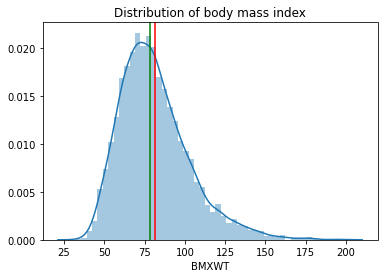

81.34267560889516
78.2


In [97]:

sns.distplot(da['BMXWT'].dropna()).set_title('Distribution of body mass index')
plt.axvline(x = da['BMXWT'].mean(), c = 'r')
plt.axvline(x = da['BMXWT'].median(), c = 'g')
plt.show()
# it's right skewed, mean should be > median
print(da['BMXWT'].mean())
print(da['BMXWT'].median())

## BMXHT - Heights

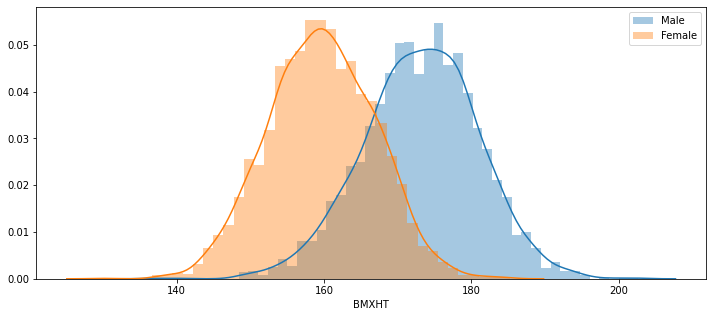

In [98]:
# Distribution of heights using the BMXHT variable in the NHANES sample:

plt.figure(figsize=(12,5))
#plt.subplot(1,2,1)
sns.distplot(da.loc[da['RIAGENDRx'] == 'Male', 'BMXHT'], bins = 50, label = 'Male')
#plt.subplot(1,2,2)
sns.distplot(da.loc[da['RIAGENDRx'] == 'Female', 'BMXHT'], label = 'Female')
plt.legend()
#plt.figure(figsize = (12,12))
plt.show()

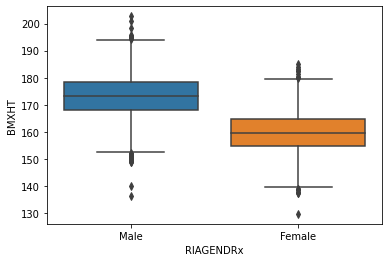

In [99]:
# boxplot
sns.boxplot(x = 'RIAGENDRx', y = 'BMXHT', data = da)

In [100]:
da.loc[da['BMXHT'] < 150, 'DMDEDUC2x'].value_counts()

<9                 91
HS/GED             57
Some college/AA    53
9-11               35
College            28
Missing             7
Name: DMDEDUC2x, dtype: int64

## DMDHHSIZ - household size

Frequency table of household sizes for people within each educational attainment category (the relevant variable is DMDEDUC2)

In [101]:
print(da['DMDHHSIZ'].describe())
print(da['DMDHHSIZ'].unique())
print(da['DMDHHSIZ'].isnull().sum())

count    5735.000000
mean        3.323801
std         1.724670
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: DMDHHSIZ, dtype: float64
[2 1 5 3 4 7 6]
0


In [102]:
dx = da['DMDHHSIZ'].fillna('Missing', inplace=False)
dx = da.groupby('DMDEDUC2x')['DMDHHSIZ'].value_counts(dropna = False)
dx = dx.unstack()
dx = dx.apply(lambda x: x / x.sum(), axis = 'rows')
#dx = dx.stack()
dx

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11,0.097403,0.092497,0.101254,0.104701,0.134478,0.192612,0.149457
<9,0.093506,0.095084,0.092575,0.092949,0.138770,0.187335,0.230978
College,0.253247,0.307245,0.255545,0.241453,0.185980,0.105541,0.095109
Don't Know,NaN,0.001294,NaN,NaN,0.001431,NaN,NaN
HS/GED,0.235065,0.207633,0.195757,0.205128,0.185980,0.205805,0.220109
Missing,0.002597,0.014230,0.053038,0.063034,0.070100,0.092348,0.105978
Some college/AA,0.318182,0.282018,0.301832,0.292735,0.283262,0.216359,0.198370


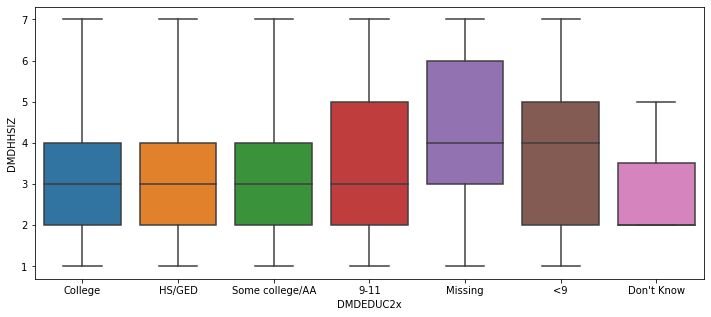

In [103]:
# it's easier to compair on boxplot 
plt.figure(figsize = (12,5))
sns.boxplot(data = da, x = 'DMDEDUC2x', y = 'DMDHHSIZ')

## SDMVSTRA, SDMVPSU

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables SDMVSTRA and SDMVPSU. Calculate the mean age (RIDAGEYR), height (BMXHT), and BMI (BMXBMI) for each gender (RIAGENDR), within each MVU

In [104]:
da['SDMVSTRA'].describe()


count    5735.000000
mean      126.236617
std         4.244406
min       119.000000
25%       123.000000
50%       126.000000
75%       130.000000
max       133.000000
Name: SDMVSTRA, dtype: float64

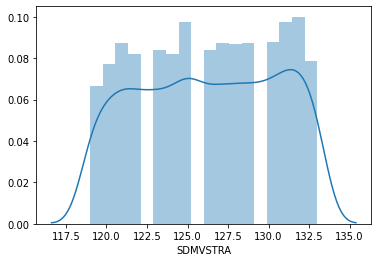

In [105]:
sns.distplot(da['SDMVSTRA'])

In [106]:
da.groupby(['RIAGENDRx', 'SDMVSTRA']).agg({
    'RIDAGEYR': 'mean',
    'BMXHT': 'mean',
    'BMXBMI': 'mean'
})

RIDAGEYR       BMXHT     BMXBMI
RIAGENDRx SDMVSTRA                                  
Female    119       50.104972  159.420994  29.041989
          120       43.678363  157.018235  30.293529
          121       44.387435  159.543085  28.687234
          122       45.273810  159.127381  27.927976
          123       45.597015  161.308081  30.255051
          124       48.329949  160.268718  29.208205
          125       51.260664  160.411594  29.523188
          126       46.732323  160.644898  30.424615
          127       50.594470  158.230093  31.473611
          128       51.870192  157.890777  30.481068
          129       44.351485  159.110396  29.238614
          130       49.418719  160.975879  31.113065
          131       49.170404  161.808636  31.735455
          132       48.115556  160.147982  30.245740
          133       46.138889  158.473446  28.521023
Male      119       50.327586  172.804310  27.033913
          120       44.011561  171.047953  29.560000
          121       44.512563  173.398985  27.925000
          122       44.484848  172.146939  27.122449
          123       49.791908  174.379532  29.037427
          124       49.905325  172.849405  28.308929
          125       52.668161  174.012217  29.459545
          126       48.548023  174.920000  29.036416
          127       53.598837  172.445294  30.813095
          128       50.227778  170.682123  29.580447
          129       44.888298  172.150000  27.768132
          130       50.526596  175.971658  29.760963
          131       50.004739  175.352153  29.168750
          132       46.266968  172.694009  28.790323
          133       46.023392  171.320833  27.764881

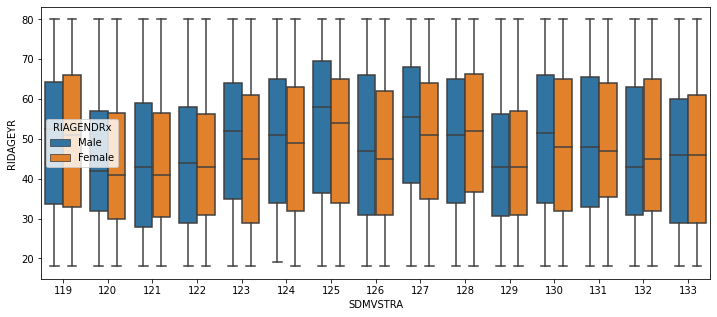

In [107]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'SDMVSTRA', y = 'RIDAGEYR', hue = 'RIAGENDRx', data = da)

In [108]:
# inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU
da.groupby(['RIAGENDRx', 'SDMVSTRA'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].quantile(q = [0.25, 0.75])

/Users/Andrew/Documents/python/playground/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


RIDAGEYR    BMXHT  BMXBMI
RIAGENDRx SDMVSTRA                                
Female    119      0.25     33.00  154.400  23.600
                   0.75     66.00  164.100  33.100
          120      0.25     30.00  152.100  24.825
                   0.75     56.50  161.275  35.000
          121      0.25     30.50  154.700  22.900
                   0.75     56.50  164.475  32.000
          122      0.25     31.00  154.175  22.975
                   0.75     56.25  163.425  32.050
          123      0.25     29.00  155.650  24.500
                   0.75     61.00  166.475  34.675
          124      0.25     32.00  155.550  23.500
                   0.75     63.00  165.500  32.550
          125      0.25     34.00  155.600  24.650
                   0.75     65.00  165.400  33.700
          126      0.25     31.00  155.475  24.550
                   0.75     62.00  166.025  34.650
          127      0.25     35.00  153.075  25.700
                   0.75     64.00  163.050  36.075
          128      0.25     36.75  152.625  25.125
                   0.75     66.25  162.275  35.000
          129      0.25     31.00  154.350  23.500
                   0.75     57.00  163.950  33.050
          130      0.25     32.00  157.250  25.200
                   0.75     65.00  166.200  35.450
          131      0.25     35.50  157.800  25.475
                   0.75     64.00  165.900  36.450
          132      0.25     32.00  154.800  23.850
                   0.75     65.00  165.850  35.100
          133      0.25     29.00  153.700  23.375
                   0.75     61.00  163.400  32.525
Male      119      0.25     33.75  167.650  23.350
                   0.75     64.25  178.100  28.850
          120      0.25     32.00  165.500  24.700
                   0.75     57.00  176.800  32.775
          121      0.25     28.00  167.900  23.650
                   0.75     59.00  178.800  30.925
          122      0.25     29.00  166.800  23.500
                   0.75     58.00  177.825  29.925
          123      0.25     35.00  169.450  24.550
                   0.75     64.00  178.800  32.750
          124      0.25     34.00  167.450  24.600
                   0.75     65.00  177.700  31.625
          125      0.25     36.50  169.700  25.200
                   0.75     69.50  178.900  33.425
          126      0.25     31.00  170.400  24.700
                   0.75     66.00  179.800  32.400
          127      0.25     39.00  168.025  26.775
                   0.75     68.00  177.275  34.375
          128      0.25     34.00  165.800  25.150
                   0.75     65.00  176.600  32.900
          129      0.25     30.75  166.350  24.100
                   0.75     56.25  177.750  30.400
          130      0.25     34.00  171.550  25.000
                   0.75     66.00  180.300  32.850
          131      0.25     33.00  170.100  24.900
                   0.75     65.50  179.400  32.200
          132      0.25     31.00  167.900  24.300
                   0.75     63.00  178.500  32.100
          133      0.25     29.00  167.075  23.975
                   0.75     60.00  176.000  30.600

# Multivariate data - NHANES case study

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


## BMXARML vs BMXLEG - arm length against leg length

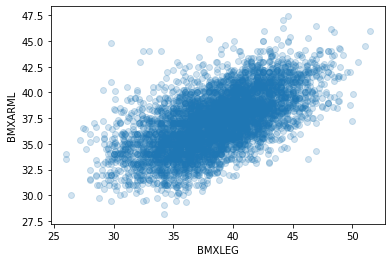

In [110]:
sns.regplot(x = 'BMXLEG', y = 'BMXARML', data = da, fit_reg = False, scatter_kws= {'alpha': 0.2})
# to mitigate overplotting we use an "alpha" channel to make the points semi-transparent

/Users/Andrew/Documents/python/playground/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


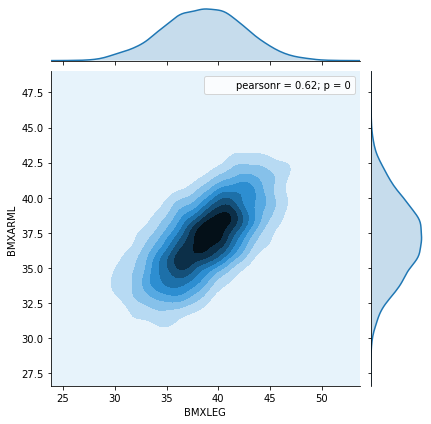

In [111]:
# Another way to avoid overplotting is to make a plot of the "density" of points
sns.jointplot(x = 'BMXLEG', y = 'BMXARML', kind = 'kde', data = da).annotate(stats.pearsonr)


### Stratifying on gender

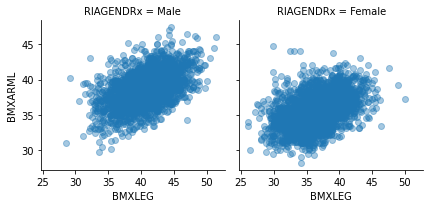

In [112]:
sns.FacetGrid(data = da, col = 'RIAGENDRx').map(plt.scatter, 'BMXLEG', 'BMXARML', alpha = 0.4).add_legend()
# sns.FacetGrid(data = da, col = 'RIAGENDRx').map(sns.jointplot, 'BMXLEG', 'BMXARML').add_legend()

 The gender-stratified plot indicates that men tend to have somewhat longer arms and legs than women -- this is reflected in the fact that the cloud of points on the left is shifted slightly up and to the right relative to the cloud of points on the right. In addition, the correlation between arm length and leg length appears to be somewhat weaker in women than in men.
 
Correlation coefficients:

In [113]:
print(da.loc[da.loc[:, 'RIAGENDRx'] == 'Female', ['BMXLEG', 'BMXARML']].dropna().corr())
print(da.loc[da.loc[:, 'RIAGENDRx'] == 'Male', ['BMXLEG', 'BMXARML']].dropna().corr())


           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


### Stratifying on gender and etnicity

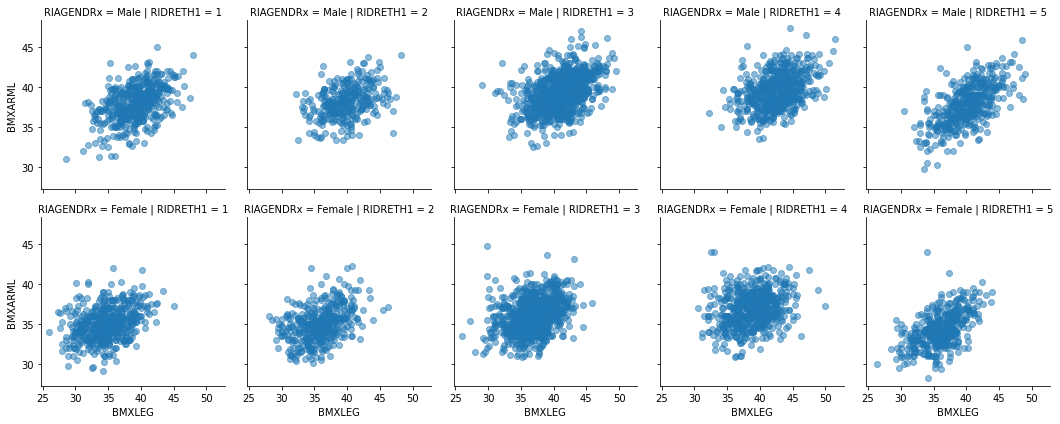

In [114]:
_ = sns.FacetGrid(da, col = 'RIDRETH1', row = 'RIAGENDRx').map(plt.scatter, 'BMXLEG', 'BMXARML', alpha = 0.5).add_legend



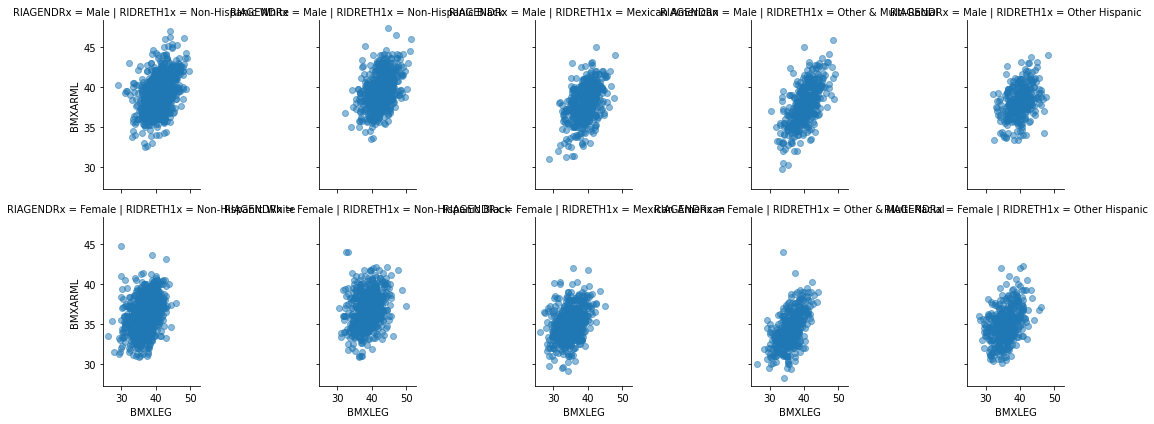

In [115]:
# https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1
da['RIDRETH1x'] = da['RIDRETH1'].replace({1: 'Mexican American', 
                                          2: 'Other Hispanic',
                                          3: 'Non-Hispanic White',
                                          4: 'Non-Hispanic Black',
                                          5: 'Other & Multi-Racial'
                                         })
#da['RIDRETH1x'].isnull().sum()
_ = sns.FacetGrid(da, col = 'RIDRETH1x', row = 'RIAGENDRx').map(plt.scatter, 'BMXLEG', 'BMXARML', alpha = 0.5).add_legend



In [164]:
# correlation coefficients between BMXLEG vs BMXARML for males and females in different reiths
reth_arr = []
c_male_arr = []
c_female_arr = []
    
for i, reth in enumerate(da['RIDRETH1x'].unique()):
    #print(f'{i}', reth)
    c_male = da.loc[(da['RIDRETH1x'] == reth) & (da['RIAGENDRx'] == 'Male') , ['BMXLEG', 'BMXARML']].corr()
    c_female = da.loc[(da['RIDRETH1x'] == reth) & (da['RIAGENDRx'] == 'Female') , ['BMXLEG', 'BMXARML']].corr()
    reth_arr.append(reth)
    c_male_arr.append(c_male.loc['BMXLEG', 'BMXARML'])
    c_female_arr.append(c_female.loc['BMXLEG', 'BMXARML'])
    #print('--- Male')
    #print(c_male)
    #print('--- Female')
    #print(c_female)

Text(0.5, 1.0, 'BMXLEG vs BMXARML Correlation for Male in Reths')

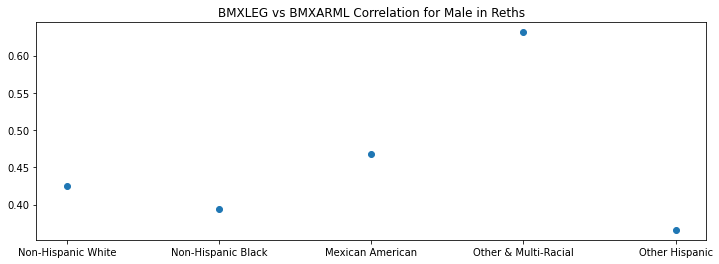

In [165]:
# plot BMXLEG vs BMXARML Correlation for Male in Reths
fig, ax = plt.subplots(figsize = (12,4))
ax.scatter(x = np.arange(len(reth_arr)), y = c_male_arr)
ax.set_xticks([0,1,2,3,4,])
ax.set_xticklabels(reth_arr)
ax.set_title('BMXLEG vs BMXARML Correlation for Male in Reths')


These scatterplots reveal differences in the means as well a diffrences in the degree of association (correlation) between different pairs of variables. We see that although some ethnic groups tend to have longer/shorter arms and legs than others, the relationship between arm length and leg length within genders is roughly similar across the ethnic groups.
One notable observation is that ethnic group 5 (4?), which consists of people who report being multi-racial or are of any race not treated as a separate group (due to small sample size), the correlation between arm length and leg length is stronger, especially for men. This is not surprising, as greater heterogeneity can allow correlations to emerge that are indiscernible in more homogeneous data.

## BPXSY1 vs BPXSY2  vs BPXDI1 vs BPXDI2 - systolic vs diastolic blood pressure

/Users/Andrew/Documents/python/playground/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


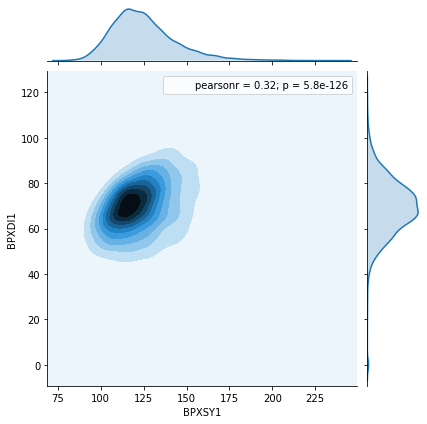

In [206]:
sns.jointplot(x = 'BPXSY1', y = 'BPXDI1', kind = 'kde', data = da).annotate(stats.pearsonr)

/Users/Andrew/Documents/python/playground/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


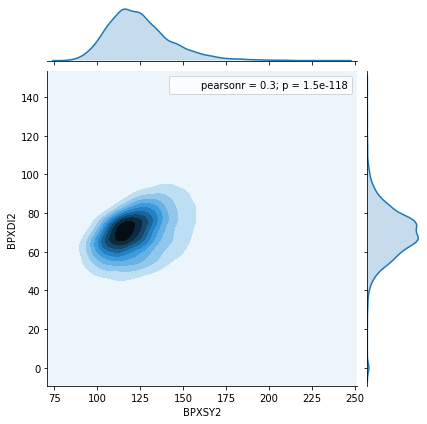

In [302]:
sns.jointplot(x = 'BPXSY2', y = 'BPXDI2', kind = 'kde', data = da).annotate(stats.pearsonr)



/Users/Andrew/Documents/python/playground/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


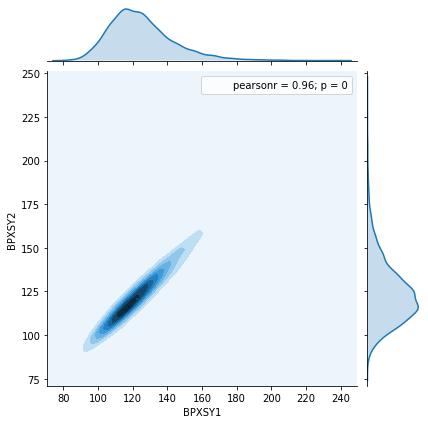

In [207]:
# repeated measures of systolic blood pressure, taken a few minutes apart on the same person are very highly correlated, with a correlation coefficient of around 0.96
sns.jointplot(x = 'BPXSY1', y = 'BPXSY2', kind = 'kde', data = da).annotate(stats.pearsonr)

### Stratifying on gender and etnicity (young vs old people)

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

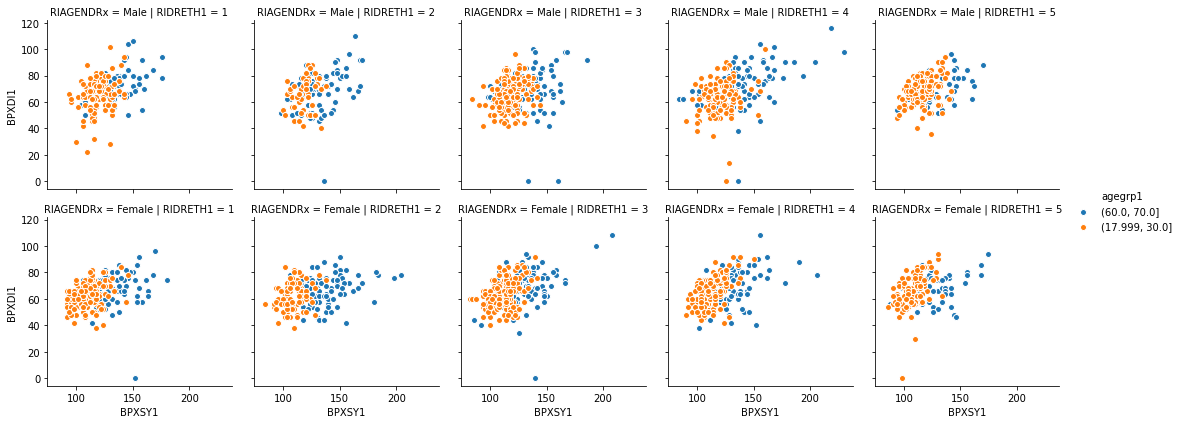

In [360]:
da['agegrp1'] = pd.cut(da['RIDAGEYR'], [18,30,40,50,60,70,80], include_lowest= True).astype(str) # str for selection on next line
da1 = da.loc[(da['agegrp1'] == '(60.0, 70.0]') | (da['agegrp1'] == '(17.999, 30.0]')]
sns.FacetGrid(da1, row = 'RIAGENDRx', col = 'RIDRETH1', hue = 'agegrp1').map(plt.scatter, 'BPXSY1', 'BPXDI1', edgecolor = 'w').add_legend()


### RIDAGEYR vs DMDEDUC2 and RIAGENDR - Ages distribution stratified by gendre and education

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment

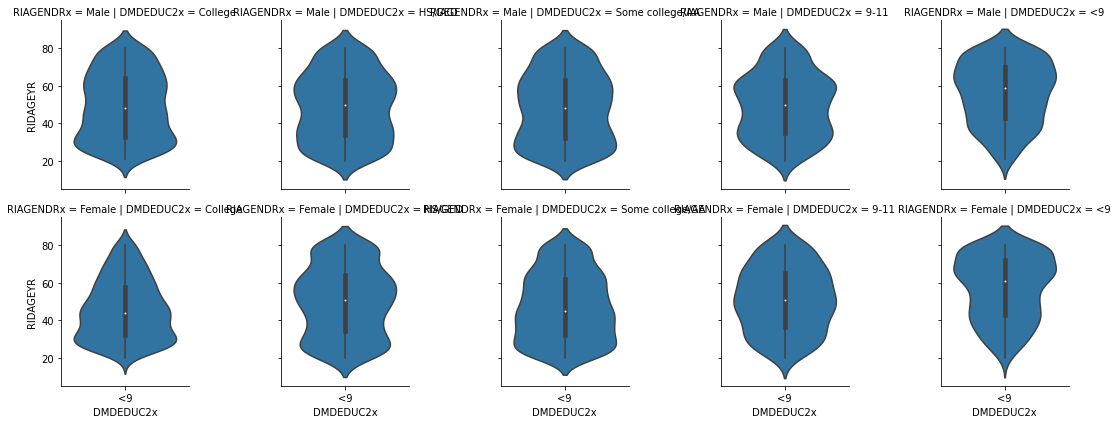

In [363]:
sns.FacetGrid(da.loc[da['DMDEDUC2x'] != 'Don\'t know', :], row = 'RIAGENDRx', col = 'DMDEDUC2x').map(sns.violinplot, 'DMDEDUC2x', 'RIDAGEYR')


### BMXBMI distribution in 10 year age bands

Compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender

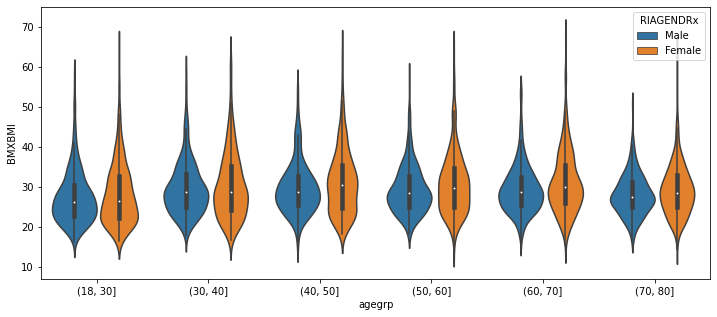

In [372]:
#sns.FacetGrid(da, col = 'agegrp', row = 'RIAGENDRx').map(sns.violinplot, 'agegrp', 'BMXBMI')
plt.figure(figsize = (12,5))
sns.violinplot('agegrp', 'BMXBMI', data = da, hue = 'RIAGENDRx') 

<Figure size 864x360 with 0 Axes>

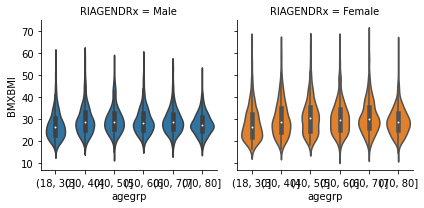

In [381]:
plt.figure(figsize = (12,5))
sns.FacetGrid(da, col = 'RIAGENDRx', hue = 'RIAGENDRx').map(sns.violinplot, 'agegrp', 'BMXBMI')

### DMDEDUC2, DMDMARTLx - contingency table (categorical values)

Contingency table counts the number of people having each combination of two factors (categorical values).

First, we create new versions of these two variables using text labels instead of numbers to represent the categories. We also create a new data set that omits people who responded "Don't know" or who refused to answer these questions.

In [169]:
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                           7: "Refused", 9: "Don't know"})

da['DMDMARTLx'] = da['DMDMARTL'].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                          6: "Living w/partner", 77: "Refused"})

print(da['DMDEDUC2x'].unique())
print(da['DMDMARTLx'].unique())

db = da.loc[(da['DMDEDUC2x'] != 'Don\'t know') & (da['DMDMARTLx'] != 'Refused')]

['College' 'HS/GED' 'Some college/AA' '9-11' nan '<9' "Don't know"]
['Married' 'Divorced' 'Living w/partner' 'Separated' 'Never married' nan
 'Widowed' 'Refused']


Now we can create a contingency table, counting the number of people in each cell defined by a combination of education and marital status.

In [170]:
x = pd.crosstab(db['DMDEDUC2x'], db['DMDMARTLx'])
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


The results will be easier to interpret if we normalize the data. A contingency table can be normalized in three ways -- we can make the rows sum to 1, the columns sum to 1, or the whole table sum to 1. Below we normalize within rows. This gives us the proportion of people in each educational attainment category who fall into each group of the marital status variable.

The modal (most common) marital status for people within each educational attainment group is "married". However quantitatively, the proportion of people who are married varies substantially, and is notably higher for college graduates (around 61%) compared to groups with lower educational attainment.

In [171]:
x.apply(lambda z: z / z.sum(), axis = 1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


We can also normalize within the columns instead of normalizing within the rows. This gives us the proportion of people with each marital status group who have each level of educational attainment.

In [172]:
x.apply(lambda z: z / z.sum(), axis = 0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


It is quite plausible that there are gender differences in the relationship between educational attainment and marital status. Therefore we can look at the proportion of people in each marital status category, for each combination of the gender and education variables. This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

In [178]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
db.groupby(['RIAGENDRx', 'DMDEDUC2x', 'DMDMARTLx']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis = 1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

One factor behind the greater number of women who are divorced and widowed could be that women live longer than men. To minimize the impact of this factor, we can recalculate the above table using a few narrow bands of ages. To simplify here, we collapse the marital status data to characterize people as being either "married" or "unmarried" This allows us to focus on the marriage rate, which is a widely-studied variable in social science research.

In [382]:
dx = db.loc[(db['RIDAGEYR'] >= 40) & (db['RIDAGEYR'] < 50), :]
a = dx.groupby(['RIAGENDRx', 'DMDEDUC2x', 'DMDMARTLx']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis = 1)

dx = db.loc[(db['RIDAGEYR'] >= 50) & (db['RIDAGEYR'] < 60), :]
b = dx.groupby(['RIAGENDRx', 'DMDEDUC2x', 'DMDMARTLx']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis = 1)

#print(a)
print(a.loc[:,['Married']].unstack())
print()
print(b['Married'].unstack())



DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDEDUC2x      9-11        <9   College    HS/GED  Some college/AA
RIAGENDRx                                                         
Female     0.490566  0.511111  0.648649  0.563107         0.496403
Male       0.666667  0.622642  0.737374  0.637255         0.555556


There are a number of intriguing results here. For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 49 and 50 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men). However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample). There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

We conclude this section by noting that marital status is associated with many factors, including gender and eduational status, but also varies strongly by age and birth cohort. For example, it is unlikely for young people to be widowed, and it is less likely for older people to be "never married", since a person can transition from "never married" into one of the other categories, but can never move back.



### RIDRETH1, HIQ210 - frequency table for the joint distribution of ethnicity groups and health-insurance status

HIQ210 - https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210

In [398]:
da['HIQ210x'] = da['HIQ210'].replace({1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don\'t know'})
da['HIQ210x'].fillna('Missing', inplace = True)
da['HIQ210x'].isnull().sum()
pd.crosstab(da['RIDRETH1x'], da['HIQ210x']).apply(lambda z: z / z.sum(), axis = 1)

HIQ210x,Don't know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other & Multi-Racial,0.002220,0.117647,0.807991,0.072142
Other Hispanic,0.000000,0.233333,0.668000,0.098667


Non-Hispanic White has the highest rate of being uninsured in the past year

## RIDAGEYR, DMDMARTLx - marital status vs age (mixture of categorical and quantitative data)

Another situation that commonly arises in data analysis is when we wish to analyze bivariate data consisting of one quantitative and one categorical variable. To illustrate methods that can be used in this setting, we consider the relationship between marital status and age in the NHANES data. Specifically, we consider the distribution of ages for people who are currently in each marital status category. A natural tool in this setting is side-by-side boxplots. Here we see some unsurprising things -- widowed people tend to be older, and never-married people tend to be younger

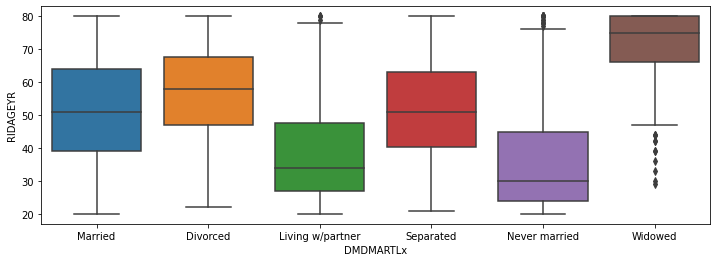

In [288]:
plt.figure(figsize = (12,4))
sns.boxplot(x = db['DMDMARTLx'], y = db['RIDAGEYR'] )

The violinplot below is based on the same data as the boxplot above. We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed. The other distributions have intermediate mean values, and are approximately symmetrically distributed. Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.

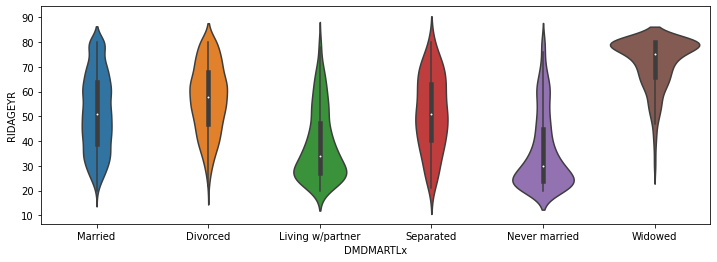

In [289]:
plt.figure(figsize = (12,4))
sns.violinplot(x = db['DMDMARTLx'], y = db['RIDAGEYR'])

# Confidence intervals


In this section, we demonstrate the construction of confidence intervals for the proportion of people who smoke.  The specific definition of "smoker" used here ([SMQ020](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020)) identifies a person as being a smoker if they self-report as having smoked 100 or more cigarettes in their lifetime.  It is more accurate to refer to this as a measure of "lifetime smoking" rather than "current smoking".  Recall that the definitions of these and other NHANES variables can be found using the NHANES code books, or by searching using the link below.

https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx




We demonstrate how to load data, clean/manipulate a dataset, and construct a confidence interval for the difference between two population proportions and means.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Investigating and cleaning data

First we replace the numeric codes in the variables of interest with text labels, and set the rare answers other than "yes" and "no" to be missing (so they will automatically be omitted from all the analyses below).

In [9]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
print(da['SMQ020'].unique())
da['SMQ020x'] = da['SMQ020'].replace({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
print(da['SMQ020x'].unique())


[1 2 7 9]
['Yes' 'No' nan]


In [8]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
print(da['RIAGENDR'].unique())
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
print(da['RIAGENDRx'].unique())


[1 2]
['Male' 'Female']


In [44]:
dx = da.loc[:, ["SMQ020x", "RIAGENDRx"]].dropna()
dx.shape
pd.crosstab(dx['SMQ020x'], dx['RIAGENDRx'])

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [45]:
# another way
dx.groupby(['SMQ020x', 'RIAGENDRx']).size().unstack()

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


### Confidence interval for one proportion

We will calculate the proportions of smokers separately for females and for males.  Initially we can compare these two proportions and their corresponding confidence intervals informally, but later we will discuss methods to compare two proportions formally using confidence intervals.

The confidence interval (CI) is constructed using two inputs: the sample proportion of smokers, and the total sample size for smokers and non-smokers combined. We calculate these values next.

In [52]:
# Number of samples and mean for Female/Male Smokers
# 1
#dx['SMQ020x'] = dx['SMQ020x'].replace({'Yes': 1, 'No': 0})
#dz = dx.groupby('RIAGENDRx').agg({'SMQ020x': [np.mean, np.size]})
# 2
# in case we don't want to replace string values with numeric
dz = dx.groupby('RIAGENDRx').agg({'SMQ020x': [lambda x: np.mean(x == 'Yes'), np.size]})

dz.columns = ["Proportion", "Total_n"]
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


Confidence intervals are closely connected to standard errors. Recall that the standard error essentially tells you how far you should expect an estimate to fall from the truth. A confidence interval is an interval that under repeated sampling covers the truth a defined proportion of the time. In most settings, this "coverage probability" is set to 95%.
It turns out that in many settings, a 95% confidence interval can be constructed as the interval consisting of all points that are within two (or 1.96) standard errors of the point estimate. More concisely, the confidence interval approximately spans from e - 2•SE to e + 2•SE, where e is the point estimate and SE is the standard error.
Since the standard error plays such an important role here, we calculate it separately first.

In [54]:
print(dz.head())
p = dz.Proportion.Female
#p = dz.loc['Female', 'Proportion']
n = dz.Total_n.Female
se_female = np.sqrt(p * (1 - p) / n)
print('se_female: ',se_female)

p = dz.loc['Male', 'Proportion']
n = dz.loc['Male', 'Total_n']
se_male = np.sqrt(p * (1 - p) / n)
print('se_male: ', se_male)

           Proportion  Total_n
RIAGENDRx                     
Female       0.304845     2972
Male         0.513258     2753
se_female:  0.008444152146214435
se_male:  0.009526078653689868


We can see that the standard errors for the estimated proportions of females and males who smoke are similar, and are each around 1% (since we are studying a proportion here, 0.01 corresponds to a 1 percentage point change in the smoking rate).
The standard error for a proportion is maximized when the true proportion is around 1/2, and gets smaller as the true proportion approaches either 0 or 1. The estimated male smoking proportion is closer to 1/2 than the estimated female smoking proportion, and the male sample size is smaller than the female sample size. Both of these factors lead to the male standard error being larger than the female standard error, although the difference is very small in this case.
Next we calculate the 95% confidence intervals for the proportions of female and male smokers using the formula for the one-sample confidence interval for a proportion:

In [55]:
p = dz.Proportion.Female # female proportion
n = dz.Total_n.Female # total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print(lcb, ucb)

0.288294683866098 0.32139576027925865


The results above indicate that any population proportion (for female lifetime smokers) between 0.288 and 0.321 would be compatible with the data that we observed in NHANES.

In [56]:
p = dz.Proportion.Male # female proportion
n = dz.Total_n.Male # total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print(lcb, ucb)

0.49458714955108174 0.531929377873546


hese results indicate that any population proportion (for male lifetime smokers) between 0.493 and 0.531 would be compatible with the NHANES data.
In a routine data analysis, we do not need to calculate these intervals manually. We can use the Statsmodels library to calculate the CI for us in one line:

In [ ]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906, 906 + 2066)

In [58]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413, 1413 + 1340)


## Constructing confidence interval for Difference of Two Population Proportions and Means

For our population proportions, we will analyze the difference of proportion between female and male smokers. The column that specifies smoker and non-smoker is "SMQ020" in our dataset.
For our population means, we will analyze the difference of mean of body mass index within our female and male populations. The column that includes the body mass index value is "BMXBMI".

Now that we have the population proportions of male and female smokers, we can begin to calculate confidence intervals.  From lecture, we know that the equation is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** from the sample and the *Margin of Error* is the **t-multiplier**.

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The Standard Error (SE) is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Lastly, the standard error for difference of population proportions and means is:

$$Standard\ Error\ for\ Difference\ of\ Two\ Population\ Proportions\ Or\ Means = \sqrt{(SE_{\ 1})^2 + (SE_{\ 2})^2}$$


## Confidence intervals comparing two independent proportions

The confidence intervals for the proportions of female and male smokers shown above are quite narrow and do not overlap. This suggests that there is a substantial difference between the lifetime smoking rates for women and men. However there is no explicit information here about how different the two population proportions might be. To address this question, we can form a confidence interval for the difference between the proportion of females who smoke and the proportion of males who smoke.
The point estimate of the difference between female and male smoking rates is -0.208 (0.305 - 0.513). That is, the smoking rate is about 20 percentage points higher in men than in women. This difference of around 20 percentage points is only a point estimate of the underlying true value -- it is not exactly equal to the difference between the unknown proportions of females and males who smoke in the population. A confidence interval helps us assess how far the estimated difference may be from the true difference.
As above, we start with the standard error. The difference between two sample proportions based on independent data has a standard error that reflects the combined uncertainty in the two proportions being differenced. This standard error can be calculated very easily. If SE1 and SE2 are the standard errors for two proportions, then sqrt(SE1^2 + SE2^2) is the standard error for the difference of these proportions (sqrt is the square root function). Note that this formula is only accurate if the two sample proportions being differenced are independent.
In the next cell we calculate the standard error for the difference between the proprotion of females who smoke and the proportion of males who smoke.

In [33]:
# For females: 
p = 0.304845
n = 2972
se_female = np.sqrt(p * (1 - p) / n)
se_female

0.00844415041930423

In [34]:
# For males: 
p = 0.513258
n = 2759
se_male = np.sqrt(p * (1 - p) / n)
se_male

0.009515714962957448

In [35]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff # bigger than std for each subgroup!

0.012722126691716604

The standard error of around 0.013 indicates that the estimated difference statistic -0.208 is expected to fall around 0.013 units from the true value. We do not know in which direction the error lies, and we do not know that the error is exactly 0.013, only that it is around this large on average. For most purposes, a standard error of 0.013 relative to an observed difference of -0.21 would be considered very small. That is, we have a very accurate estimate of the difference between smoking rates in women and in men.
Now that we have the standard error, we can construct a 95% confidence interval for the difference in proportions by taking the estimate and subtracting and adding two (or 1.96) standard errors from it.

In [36]:
diff = dz.Proportion.Female - dz.Proportion.Male
lcb = diff - 1.96 * se_diff
ucb = diff + 1.96 * se_diff
(lcb, ucb)

(-0.23334836831576455, -0.18347763168423548)

The 95% confidence interval above shows us that any value for the difference of population proportions (between females and males) lying between -0.233 and -0.183 is consistent with the observed data.

### Smokers proportion among female vs age

In [226]:
pr['agegrp']

0    (18, 30]
1    (30, 40]
2    (40, 50]
3    (50, 60]
4    (60, 70]
5    (70, 80]
Name: agegrp, dtype: category
Categories (6, interval[int64]): [(18, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

            Female
agegrp            
(18, 30]  0.226601
(30, 40]  0.286920
(40, 50]  0.268924
(50, 60]  0.421277
(60, 70]  0.374150
(70, 80]  0.324390


Text(0.5, 0, 'Age group')

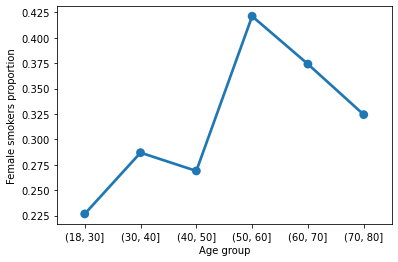

In [232]:
da['agegrp'] = pd.cut(da['RIDAGEYR'], [18,30,40,50,60,70,80])
pr = da.loc[da['RIAGENDRx'] == 'Female'].groupby('agegrp').agg({'SMQ020x': lambda x: np.mean(x == 'Yes')})
pr.columns = ['Female']
#pr.reset_index(inplace=True)
print(pr)


#g = sns.relplot(x = np.arange(pr.shape[0]), y = 'Female', markers = True, style = 1, data = pr, kind = 'line')
g = sns.pointplot(x = np.arange(pr.shape[0]), y = 'Female', data = pr)
g.set_xticklabels(pr.index)
g.set_ylabel('Female smokers proportion')
g.set_xlabel('Age group')

## Confidence intervals for subpopulations

Since smoking rates vary strongly with age, it might be more informative to stratify the data into homogeneous age bands and compare the proportions of female and male smokers within each age band.  We can also calculate the 95% confidence interval for this difference within each age band.  These data can be displayed as a plot, with the difference in proportions plotted as a curve.  The confidence intervals can then be used to construct a "confidence band" around the estimates.

As a final example, we refine the analysis above by considering the difference of mean BMI values between females and males within age bands. We see below that the overall average difference of 1.1 units results from differences that are very different based on age. Specifically, the difference between female and male BMI is much smaller than 1.1 for younger people, and much larger than 1.1 for older people.
Since the confidence bands for people under 40 contain 0, the data are consistent with there being no difference between female and male BMI in this age range. For people older than 40, a hypothetical zero difference between the mean BMI values for females and males is not very consistent with the data. Informally, we can say that the data strongly suggest that the female mean BMI is greater than the male mean BMI in this age band, with the difference being anywhere from 0.5 to 2 units.

In [221]:
# Calculate the smoking rates within age/gender groups
#print(da.head())
da['agegrp'] = pd.cut(da['RIDAGEYR'], [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(['agegrp', 'RIAGENDRx']).agg({'SMQ020x': lambda x: np.mean(x == 'Yes')}).unstack()
pr.columns = ['Female', 'Male']
pr


,Female,Male
agegrp,,
"(18, 30]",0.226601,0.349265
"(30, 40]",0.286920,0.502183
"(40, 50]",0.268924,0.448878
"(50, 60]",0.421277,0.572687
"(60, 70]",0.374150,0.654462
"(70, 80]",0.324390,0.649254


In [94]:
# The number of people for each calculated proportion
dn = da.groupby(['agegrp', 'RIAGENDRx']).agg({'SMQ020x': np.size}).unstack()
dn.columns = ['Female', 'Male']
dn

,Female,Male
agegrp,,
"(18, 30]",609,544
"(30, 40]",474,458
"(40, 50]",502,401
"(50, 60]",470,454
"(60, 70]",441,437
"(70, 80]",410,402


In [95]:
# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)
se

,Female,Male
agegrp,,
"(18, 30]",0.016964,0.020440
"(30, 40]",0.020776,0.023363
"(40, 50]",0.019790,0.024838
"(50, 60]",0.022776,0.023217
"(60, 70]",0.023043,0.022748
"(70, 80]",0.023120,0.023801


In [96]:
# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)
se_diff

agegrp
(18, 30]    0.026562
(30, 40]    0.031265
(40, 50]    0.031758
(50, 60]    0.032523
(60, 70]    0.032380
(70, 80]    0.033182
dtype: float64

agegrp
(18, 30]   -0.122664
(30, 40]   -0.215264
(40, 50]   -0.179954
(50, 60]   -0.151411
(60, 70]   -0.280313
(70, 80]   -0.324863
dtype: float64


Text(0, 0.5, 'Female/male smoking proportion')

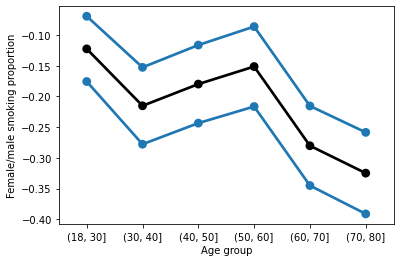

In [222]:
# The difference in smoking rates between genders
pq = pr.Female - pr.Male
print(pq)
x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color = 'black')
sns.pointplot(x, pq - 2 * se_diff)
sns.pointplot(x, pq + 2 * se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel('Age group')
pp.set_ylabel('Female/male smoking proportion')

Text(0, 0.5, 'Female - male BMI difference')

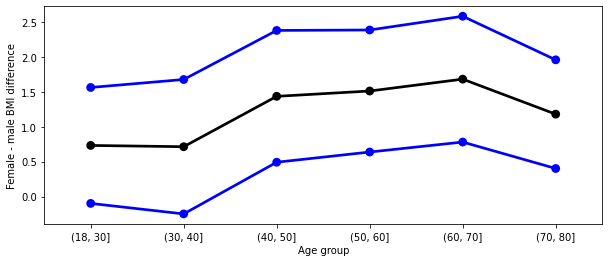

In [254]:
# Calculate the mean, SD, and sample size for BMI within age/gender groups
da['agegrp'] = pd.cut(da['RIDAGEYR'], [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(['agegrp', 'RIAGENDRx']).agg({'BMXBMI': [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band
pr['BMXBMI', 'sem', 'Female'] = pr['BMXBMI', 'std', 'Female'] / np.sqrt(pr['BMXBMI', 'size', 'Female'])
pr['BMXBMI', 'sem', 'Male'] = pr['BMXBMI', 'std', 'Male'] / np.sqrt(pr['BMXBMI', 'size', 'Male'])

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr['BMXBMI', 'mean_diff', ''] = pr['BMXBMI', 'mean', 'Female'] - pr['BMXBMI', 'mean', 'Male']
pr['BMXBMI', 'sem_diff', ''] = np.sqrt(pr['BMXBMI', 'sem', 'Female']**2 + pr['BMXBMI', 'sem', 'Male']**2)
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""] 

#print(pr)

# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
plt.figure(figsize = (10,4))
pp = sns.pointplot(x = x, y = pr['BMXBMI', 'mean_diff', ''], color = 'black')
sns.pointplot(x = x, y = pr['BMXBMI', 'lcb_diff', ''], color = 'blue')
sns.pointplot(x = x, y = pr['BMXBMI', 'ucb_diff', ''], color = 'blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel('Age group')
pp.set_ylabel('Female - male BMI difference')




**Inter-group and intra-group differences:** As the sample size grows, estimates become increasingly precise, but it is important to remember that a highly precise estimate for the mean does not imply that individuals within a population do not vary from each other.  To put the differences shown above in context, below we show the underlying summaries on which the plot above was based.  Note that the standard deviation of BMI within both females and males ranges from around 5 to around 8 depending on the age band.  This means, for example, that two randomly-selected males will tend to have BMI values that differ by around 6 units.  This is a far greater difference than the mean difference of up to around 1.5 BMI units between females and males.  Thus, while there is a tendency for females to have slightly higher BMI than males, the heterogeneity within genders is substantially greater than the difference of means between genders.

## Confidence intervals for the mean

In this section, we discuss how to construct confidence intervals for the mean. First note that the proportion discussed above is also a mean -- for example, if the data are 0, 1, 0, then the mean is 1/3, which is also the proportion of 1's in the data. However the proportion has the special property that the variance is completely determined by the mean. That is why we constructed the standard errors for the sample proportion above using p•(1 - p) as the variance. In general, the variance of quantitative data will not be a function of the mean, as this is a very special property of binary data. Therefore, in general we must estimate the variance as a separate step after estimating the mean.
To illustrate the construction of confidence intervals for the population mean of a quantitative variable, we will use the body mass inde (BMI) data from NHANES. To begin, we calculate the mean BMI for all women and for all men in the NHANES sample.

In [37]:
da['BMXBMI'].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [38]:
da.groupby('RIAGENDRx').agg({'BMXBMI': [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

The numbers in the first column of the table above are estimates of the population mean BMI for all women and for all men in the United States (the population that the NHANES study represents). As with the sample proportions, these numbers are not exactly equal to the mean BMI for all women and men, they are only estimates. To establish the uncertainty for these estimates, we can use the standard errors for these two estimated means.
The standard error for the mean based on an independent and identically distributed sample is equal to the standard deviation of the variable divided by the square root of the sample size. We next calculate all the relevant values needed to compute the standard error.

In [39]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [ ]:
lcb_female = 29.94 - 1.96 * 7.753 / np.sqrt(2976)
ucb_female = 29.94 + 1.96 * 7.753 / np.sqrt(2976)
print(lcb_female, ucb_female)

Below we show how the one-sample confidence interval can be calculated using Statsmodels. The numbers differ slightly due to rounding in the calculation above. The result below is more exact.

In [2]:
import statsmodels.api as sm
female_bmi = da.loc[da['RIAGENDRx'] == 'Female', 'BMXBMI'].dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()



NameError: name 'da' is not defined

## Difference of Two Population Means

Now we turn to studying the difference between two means, taking the difference between mean female and male BMI for illustration.  As discussed above, the standard error for the difference of two means taken from independent samples is sqrt(SE1^2 + SE2^2), where SE1 and SE2 are the standard errors for the two means being compared.  Below we see that this gives us a value around 0.19 when comparing the female BMI to the male BMI.  This is substantially larger than either the SEM for estimating the female mean (0.14) or the SEM for estimating the male mean (0.12).  It is expected that the standard error for the difference between two means is greater than the standard errors for estimating a single mean, since the uncertainty of both gender-specific proportions impacts the statistic.

In [40]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff # lager than std for each subgroup!

0.18538993598139303

In [41]:
diff = 29.939946 - 28.778072

In [43]:
lcb = diff - 1.96 * sem_diff
ucb = diff + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)

This finding indicates that while the point estimate shows that the women in our sample have around 1.1 unit greater BMI than the men in our sample, the true difference between the mean for all women in the population and for all men in the population could fall between 0.79 and 1.53, and still be consistent with the observed data.

## Confidence intervals and sample size

Confidence intervals reflect the precision of an estimate, which is largely driven by the amount of data used to construct the estimate.  We can explore the relationship between precision and sample size by subampling data from NHANES and calculating confidence intervals for the subsamples.  Below we calculate confidence intervals based on subsamples of size 100, 200, 400, and 800.

A wider confidence interval implies that we have less precision in our estimate.  In the simulation below, we calculate the average width of the confidence intervals constructed for each sample size.  We see that the confidence interval steadily becomes shorter as the sample size grows.  For most settings, the confidence interval will become around half as wide when the sample size is increased by a factor of 4.  Below we see this scaling when the sample size increases from 100 to 400, and when it increases from 200 to 800, both of which are increases by a factor of 4.

In [257]:
dx = da.loc[da['RIAGENDRx'] == 'Female', ['RIAGENDRx', 'BMXBMI']].dropna()

all_cis = []
for n in 100, 200, 400, 800:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz['BMXBMI']).zconfint_mean()
        cis.append(ci)
    cis = np.asarray(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)
    #print(cis.shape)
    #mean_width = cis[:, 1].mean()

NameError: name 'sm' is not defined

It is also informative to plot the individual confidence intervals, computed for 500 subsamples of size 100, to see how they vary. The vertical grey bars below each correspond to a confidence interval. The red horizontal line is the mean BMI calculated using the entire data set, which can be taken as a proxy for othe population mean. While the individual intervals are quite different from each other, it appears that the vast majority of them cover the population value.

In [ ]:
ci = all_cis[0]
for j, x in enumerate(ci):
    plt.plot([j,j], x, color = 'grey')
    plt.gca().set_ylabel('BMI')
mn = dx['BMXBMI'].mean()
plt.plot([0, 500], [mn, mn], color = 'red')

We can calculate the fraction of the 500 simulated confidence intervals that did not cover the target value. This is called the "non-coverage probability". There are two ways for an interval to fail to cover the target -- either the upper limit of the interval can fall below the target, or the lower limit of the interval can fall above the target. We calculate each of these below. The sum of these two probabilities should be around 0.05, which is the allowed proportion of the time that a 95% confidence interval does not cover its target.

In [ ]:
print(np.mean(ci[:, 1] < mn)) # Upper limit falls below the target
print(np.mean(ci[:, 0] > mn)) # Lower limit falls above the target

In [9]:
routing_number = '122187238'
#list(routing_number)
d = [int(i) for i in routing_number]
d

[1, 2, 2, 1, 8, 7, 2, 3, 8]